In [1]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Import necessary items from Keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

/home/datah/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1. 数据加载

### 数据1

In [13]:
# 自定义数据集
addr = './input/xiqu_data_1_lab.pkl'
labels_f = pickle.load(open(addr, "rb" ))

addr = './input/xiqu_data_1.pkl' 
images_f = pickle.load(open(addr, "rb" ))

In [14]:
images_f.shape

(1488, 80, 160, 3)

In [15]:
labels_f.shape

(1488, 80, 160, 1)

### 标签归一化

In [28]:
labels_f = labels_f / 255

In [29]:
# label_z = label_z / 255

### 刷洗

In [30]:
train_images_z, label_z = shuffle(images_f, labels_f)

### 切分

In [31]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(train_images_z, label_z, test_size=0.1)

In [32]:
X_train_1.shape

(1339, 80, 160, 3)

### 加载数据2

In [33]:
## 加载网上训练集
train_images_2 = pickle.load(open("./input/full_CNN_train.pkl", "rb" ))

labels_w = pickle.load(open("./input/train_labels.pkl", "rb" ))

train_images_w = np.array(train_images_2)

In [34]:
labels_w.shape

(12764, 80, 160, 1)

In [35]:
train_images_w.shape

(12764, 80, 160, 3)

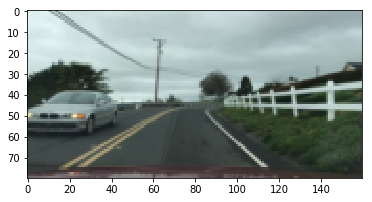

In [36]:
# # 查看一下数据
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(train_images_w[692])

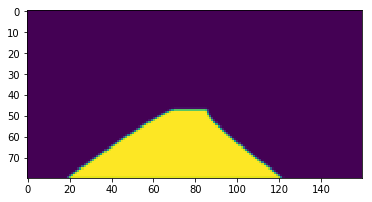

In [37]:
# 查看标签
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(labels_w[692].reshape(80,160))

### 对标签进行归一化

In [38]:
labels_w = labels_w / 255

In [39]:
train_images_w, labels_w = shuffle(train_images_w, labels_w)

In [40]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(train_images_w, labels_w, test_size=0.1)

In [41]:
X_train_2.shape

(11487, 80, 160, 3)

### 合并数据集

In [42]:
# 把两部分数据合在一起
X_train = np.concatenate((X_train_2,X_train_1))   
X_val = np.concatenate((X_val_2,X_val_1))   
y_train = np.concatenate((y_train_2,y_train_1))  
y_val = np.concatenate((y_val_2,y_val_1))  

In [44]:
X_train, y_train = shuffle(X_train, y_train)
X_val, y_val = shuffle(X_val, y_val)

In [49]:
batch_size = 128
epochs = 40
pool_size = (2, 2)
input_shape = X_train.shape[1:]


## 2.模型

In [50]:
model = Sequential()
# batchnormalization，可以把过大或过小的信号进行归一化。有效避免上述问题，使得深度学习网络更容易训练。所以效果好。
model.add(BatchNormalization(input_shape=input_shape))

# Conv Layer 1
model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

# Conv Layer 2
model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

# Pooling 1
model.add(MaxPooling2D(pool_size=pool_size))

# Conv Layer 3
model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
model.add(Dropout(0.2))

# Conv Layer 4
model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
model.add(Dropout(0.2))

# Conv Layer 5
model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
model.add(Dropout(0.2))

# Pooling 2
model.add(MaxPooling2D(pool_size=pool_size))

# Conv Layer 6
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
model.add(Dropout(0.2))

# Conv Layer 7
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
model.add(Dropout(0.2))

# Conv Layer 8
model.add(Conv2D(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv8'))
model.add(Dropout(0.3))

# Pooling 3
model.add(MaxPooling2D(pool_size=pool_size))

# Upsample 1
model.add(UpSampling2D(size=pool_size))

# Deconv 1
model.add(Conv2DTranspose(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
model.add(Dropout(0.3))

# Deconv 2
model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
model.add(Dropout(0.2))

# Deconv 3
model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
model.add(Dropout(0.2))

# Upsample 2
model.add(UpSampling2D(size=pool_size))

# Deconv 4
model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
model.add(Dropout(0.2))

# Deconv 5
model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
model.add(Dropout(0.2))

# Deconv 6
model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1) , activation = 'relu', name = 'Deconv6'))
model.add(Dropout(0.2))

# Upsample 3
model.add(UpSampling2D(size=pool_size))

# Deconv 7
model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv7'))

# Final layer 
model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

In [51]:
# 图像数据增强
datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)

In [52]:
model.compile(optimizer='Adam', loss='mean_squared_error')     


model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,
epochs=epochs, verbose=1, validation_data=(X_val, y_val))

# 冻结网络参数更新
model.trainable = False
model.compile(optimizer='Adam', loss='mean_squared_error')

# 保存模型
model.save('model.h5')
 
# 展示模型
model.summary()

Epoch 1/40
101/100 [==============================] - 19s 183ms/step - loss: 0.0581 - val_loss: 0.0386
Epoch 2/40
101/100 [==============================] - 17s 172ms/step - loss: 0.0197 - val_loss: 0.0181
Epoch 3/40
101/100 [==============================] - 17s 171ms/step - loss: 0.0142 - val_loss: 0.0126
Epoch 4/40
101/100 [==============================] - 18s 174ms/step - loss: 0.0121 - val_loss: 0.0112
Epoch 5/40
101/100 [==============================] - 17s 171ms/step - loss: 0.0112 - val_loss: 0.0099
Epoch 6/40
101/100 [==============================] - 18s 175ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 7/40
101/100 [==============================] - 18s 173ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 8/40
101/100 [==============================] - 17s 171ms/step - loss: 0.0099 - val_loss: 0.0087
Epoch 9/40
101/100 [==============================] - 17s 173ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 10/40
101/100 [==============================] - 17s 173ms/step - l